What is RFM (recency, frequency, monetary) analysis?
RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns. The system assigns each customer numerical scores based on these factors to provide an objective analysis. RFM analysis is based on the marketing adage that "80% of your business comes from 20% of your customers."

RFM analysis ranks each customer on the following factors:

- Recency. How recent was the customer's last purchase? Customers who recently made a purchase will still have the product on their mind and are more likely to purchase or use the product again. Businesses often measure recency in days. But, depending on the product, they may measure it in years, weeks or even hours.

- Frequency. How often did this customer make a purchase in a given period? Customers who purchased once are often are more likely to purchase again. Additionally, first time customers may be good targets for follow-up advertising to convert them into more frequent customers.

- Monetary. How much money did the customer spend in a given period? Customers who spend a lot of money are more likely to spend money in the future and have a high value to a business.

* What is a good RFM score? The best RFM score is the one with the highest values for each variable. If a store uses a 1 to 4 scale for recency, frequency, and monetary, with 4 being the highest, then the perfect RFM score is 444.

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime , date
import warnings
warnings.filterwarnings('ignore')

In [170]:
data=pd.read_csv('online.csv')
data.head(10)   

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom
5,125615,547051,22028,PENNY FARTHING BIRTHDAY CARD,12,2011-03-20 12:06:00,0.42,12902,United Kingdom
6,483123,577493,20724,RED RETROSPOT CHARLOTTE BAG,10,2011-11-20 12:13:00,0.85,17323,United Kingdom
7,449888,575143,23343,JUMBO BAG VINTAGE CHRISTMAS,10,2011-11-08 15:37:00,2.08,13643,United Kingdom
8,127438,547223,22934,BAKING MOULD EASTER EGG WHITE CHOC,2,2011-03-21 15:10:00,2.95,12867,United Kingdom
9,189515,553156,21212,PACK OF 72 RETROSPOT CAKE CASES,2,2011-05-13 14:58:00,0.55,17841,United Kingdom


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70864 non-null  int64  
 1   InvoiceNo    70864 non-null  int64  
 2   StockCode    70864 non-null  object 
 3   Description  70864 non-null  object 
 4   Quantity     70864 non-null  int64  
 5   InvoiceDate  70864 non-null  object 
 6   UnitPrice    70864 non-null  float64
 7   CustomerID   70864 non-null  int64  
 8   Country      70864 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 4.9+ MB


In [172]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [173]:
data['TotalSum']=data['Quantity']*data['UnitPrice']

In [174]:
data.isna().sum()

Unnamed: 0     0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalSum       0
dtype: int64

In [175]:
max_trans_date = max(data['InvoiceDate']).date()
max_trans_date

datetime.date(2011, 12, 9)

In [176]:
# Define a function that will parse the date
def get_day(x): return datetime(x.year, x.month, x.day) 

# Create InvoiceDay column
data['InvoiceDay'] = data['InvoiceDate'].apply(get_day) 

In [177]:
rfm_table = data.groupby('CustomerID').agg({'InvoiceDay': lambda x:(datetime.strptime(str(max_trans_date),'%Y-%m-%d')-x.max()).days,
                                           'InvoiceNo':'count',
                                           'TotalSum':'sum'                                         
})
rfm_table.rename(columns={'InvoiceDay':'Recency','InvoiceNo':'Frequency','TotalSum':'Monetary'},inplace=True)

rfm_table.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12747,2,27,992.82
12748,0,967,7522.06
12749,3,37,813.45
12820,3,17,268.02
12822,70,9,146.15
12823,296,1,306.00
12824,59,6,106.38
12826,2,17,291.26
12827,32,2,44.55


In [178]:
r_labels=range(4,0,-1)
f_labels=range(1,5,1)
m_labels=range(1,5,1)

In [179]:
rfm_table['R']=pd.qcut(rfm_table['Recency'],q=4,labels=r_labels)
rfm_table['F']=pd.qcut(rfm_table['Frequency'],q=4,labels=f_labels)
rfm_table['M']=pd.qcut(rfm_table['Monetary'],q=4,labels=m_labels)

In [180]:
rfm_table

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12747,2,27,992.82,4,4,4
12748,0,967,7522.06,4,4,4
12749,3,37,813.45,4,4,4
12820,3,17,268.02,4,3,3
12822,70,9,146.15,2,2,3
...,...,...,...,...,...,...
18280,277,2,38.70,1,1,1
18281,180,2,31.80,1,1,1
18282,7,2,30.70,4,1,1


### Building RFM Scores and RFM Segments

In [181]:
def join_rfm(data):
    return str(data['R'])+str(data['F'])+str(data['M'])


In [212]:
rfm_table['RFM_Segment']=rfm_table.apply(join_rfm,axis=1)
rfm_table['RFM_Score']=rfm_table[['R','M','F']].sum(axis=1)

In [213]:
rfm_table.groupby('RFM_Segment').size().sort_values(ascending=False)[:10].to_frame().reset_index()

,RFM_Segment,0
0,444,379
1,111,345
2,344,165
3,211,165
4,233,131
5,222,130
6,311,128
7,333,124
8,122,116
9,433,114


In [214]:
def rfm_level(data):
    if data['RFM_Score']>=10:
        return 'Top'
    elif data['RFM_Score']>=6 and data['RFM_Score']<10:
        return 'Middle'
    else :
        return 'Low'        

In [215]:
rfm_table['Level']=rfm_table.apply(rfm_level,axis=1)

In [216]:
rfm_table.sort_values(by='RFM_Score',ascending=False)

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Level
CustomerID,,,,,,,,,
12747,2,27,992.82,4,4,4,444,12,Top
16839,8,50,2806.17,4,4,4,444,12,Top
15189,1,41,3379.11,4,4,4,444,12,Top
15187,1,26,1636.38,4,4,4,444,12,Top
16873,4,55,1323.21,4,4,4,444,12,Top
...,...,...,...,...,...,...,...,...,...
15280,172,4,23.32,1,1,1,111,3,Low
17194,360,4,51.92,1,1,1,111,3,Low
17187,226,2,31.60,1,1,1,111,3,Low


#### Analyzing Custom Segments

In [188]:
rfm_level_agg=rfm_table.groupby('Level').agg({'Recency':'mean','Frequency':'mean','Monetary':('mean','count')})

In [203]:
rfm_level_agg

Recency  Frequency    Monetary      
              mean       mean        mean count
Level                                          
Low     189.137024   3.247731   53.426007  1102
Middle   76.125969  10.934109  205.202927  1548
Top      19.975262  47.915319  981.760894  1051

<AxesSubplot:title={'center':'Count of Each Segment'}, xlabel='Level', ylabel='count'>

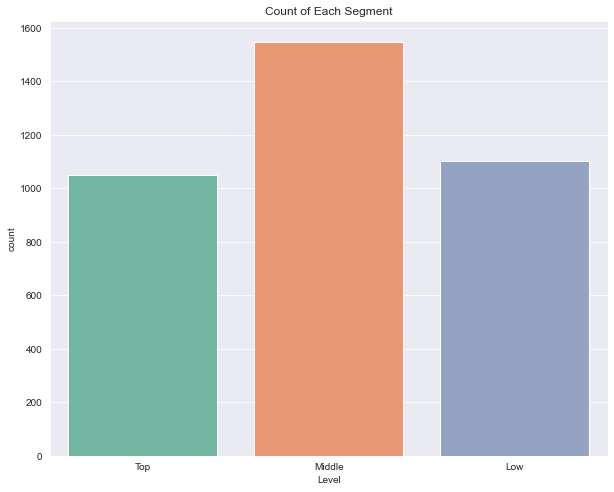

In [204]:
plt.figure(figsize=(10,8))
sns.set_palette('Set2')
sns.set_style('darkgrid')
plt.title('Count of Each Segment')
plt.xlabel('Segments')
plt.ylabel('Count')
sns.countplot(rfm_table['Level'])

In [205]:
snake_date=rfm_table[['Recency','Frequency','Monetary','Level']]
x=snake_date[['Level']].reset_index()
x

,CustomerID,Level
0,12747,Top
1,12748,Top
2,12749,Top
3,12820,Top
4,12822,Middle
...,...,...
3696,18280,Low
3697,18281,Low
3698,18282,Middle
3699,18283,Top


In [192]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
snake_date_scaled=scaler.fit_transform(snake_date[['Recency','Frequency','Monetary']])


In [193]:
snake_date_scaled=pd.DataFrame(snake_date_scaled,columns=scaler.get_feature_names_out())

In [194]:
snake_date_scaled

,Recency,Frequency,Monetary
0,-0.918710,0.175184,0.415366
1,-0.938719,21.145364,4.844711
2,-0.908705,0.398272,0.293683
3,-0.908705,-0.047903,-0.076329
4,-0.238409,-0.226372,-0.159004
...,...,...,...
3696,1.832508,-0.382533,-0.231896
3697,0.862078,-0.382533,-0.236577
3698,-0.868688,-0.382533,-0.237323
3699,-0.908705,2.963772,0.035544


In [195]:
snake_date_scaled=snake_date_scaled.join(x)

In [209]:
# Melt the normalized dataset and reset the index
snake_date = pd.melt(
  					snake_date_scaled.reset_index(), 
                        
# Assign CustomerID and Cluster as ID variables                  
                    id_vars=['CustomerID', 'Level'],

# Assign RFM values as value variables
                    value_vars=['Recency', 'Frequency', 'Monetary'], 
                        
# Name the variable and value
                    var_name='Metric', value_name='Value'
					)


In [210]:
snake_date

,CustomerID,Level,Metric,Value
0,12747,Top,Recency,-0.918710
1,12748,Top,Recency,-0.938719
2,12749,Top,Recency,-0.908705
3,12820,Top,Recency,-0.908705
4,12822,Middle,Recency,-0.238409
...,...,...,...,...
11098,18280,Low,Monetary,-0.231896
11099,18281,Low,Monetary,-0.236577
11100,18282,Middle,Monetary,-0.237323
11101,18283,Top,Monetary,0.035544


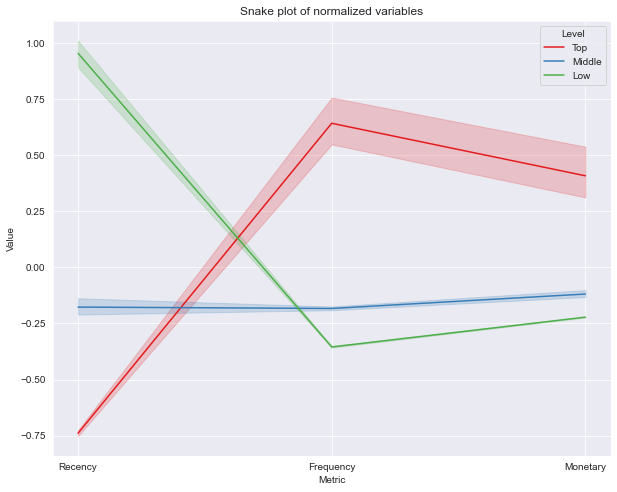

In [211]:
plt.figure(figsize=(10,8))

plt.title('Snake plot of normalized variables')
plt.xlabel('Metric')
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=snake_date, x='Metric', y='Value', hue='Level',palette='Set1')
plt.show()